## Descriptive analysis

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
nodes_et = pd.read_csv("../data/nodes_et.csv")
edges_et = pd.read_csv("../data/edges_et.csv")
nodes_en = pd.read_csv("../data/nodes_en.csv")
edges_en = pd.read_csv("../data/edges_en.csv")

In [3]:
G_et = nx.from_pandas_edgelist(edges_et, source ='source', target='target')
G_en = nx.from_pandas_edgelist(edges_en, source ='source', target='target')

In [4]:
def net_prop_dict(G):
    prop_dict = {}
    prop_dict['no_of_nodes'] = nx.number_of_nodes(G)
    prop_dict['no_of_edges'] = nx.number_of_edges(G)
    if nx.is_connected(G):
        prop_dict['average_shortest_path_length'] = nx.average_shortest_path_length(G)
        prop_dict['diameter'] = nx.diameter(G)
    prop_dict['transitivity'] = nx.transitivity(G)
    prop_dict['average_clustering'] = nx.average_clustering(G)   
    prop_dict['edge_density'] = nx.classes.function.density(G)
    prop_dict['average_degree'] = np.array([d for n, d in G.degree()]).sum()/nx.number_of_nodes(G)
    prop_dict['total_triangles'] = np.array(list(nx.triangles(G).values())).sum()
    prop_dict['number_connected_components'] = nx.algorithms.components.number_connected_components(G)
    return prop_dict

In [5]:
# Estonian graph
net_prop_dict(G_et)

{'no_of_nodes': 7488,
 'no_of_edges': 12301,
 'average_shortest_path_length': 3.4936460020731093,
 'diameter': 4,
 'transitivity': 0.013884061123749441,
 'average_clustering': 0.12358851699982525,
 'edge_density': 0.0004388304399991324,
 'average_degree': 3.2855235042735043,
 'total_triangles': 29997,
 'number_connected_components': 1}

In [6]:
# English graph
net_prop_dict(G_en)

{'no_of_nodes': 31817,
 'no_of_edges': 68744,
 'average_shortest_path_length': 3.5354960294408695,
 'diameter': 4,
 'transitivity': 0.012261303912821972,
 'average_clustering': 0.2751923792388532,
 'edge_density': 0.0001358188311141833,
 'average_degree': 4.321211930728856,
 'total_triangles': 480717,
 'number_connected_components': 1}

### Node degree

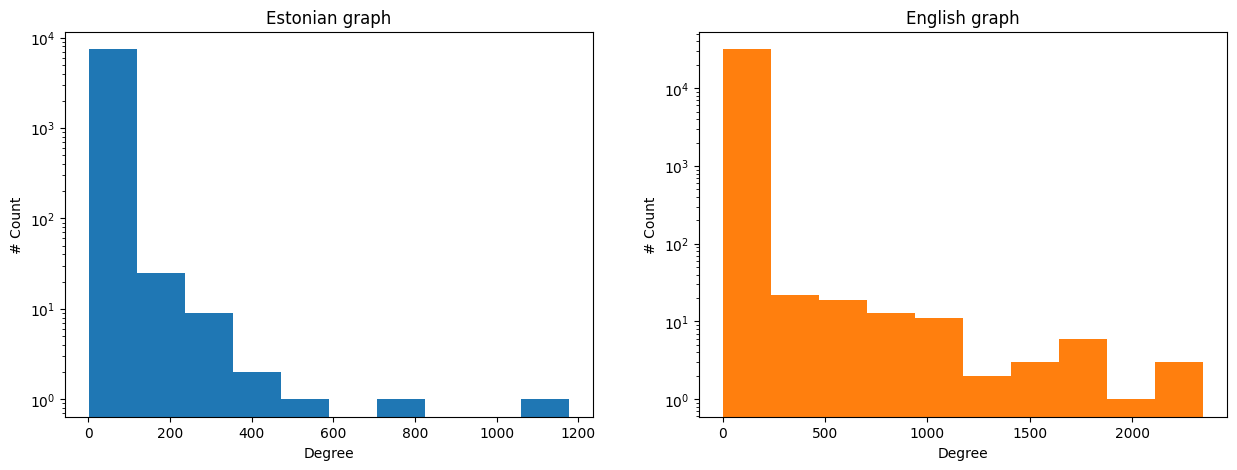

In [7]:
degrees_et = [G_et.degree(n) for n in G_et.nodes()]
degrees_en = [G_en.degree(n) for n in G_en.nodes()]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(degrees_et, color = "C0")
axs[0].set_yscale("log")
axs[0].set_xlabel("Degree")
axs[0].set_ylabel("# Count")
axs[0].set_title("Estonian graph")
axs[1].hist(degrees_en, color = "C1")
axs[1].set_yscale("log")
axs[1].set_xlabel("Degree")
axs[1].set_ylabel("# Count")
axs[1].set_title("English graph")
plt.savefig("nodedegrees.png", dpi=300)
plt.show()

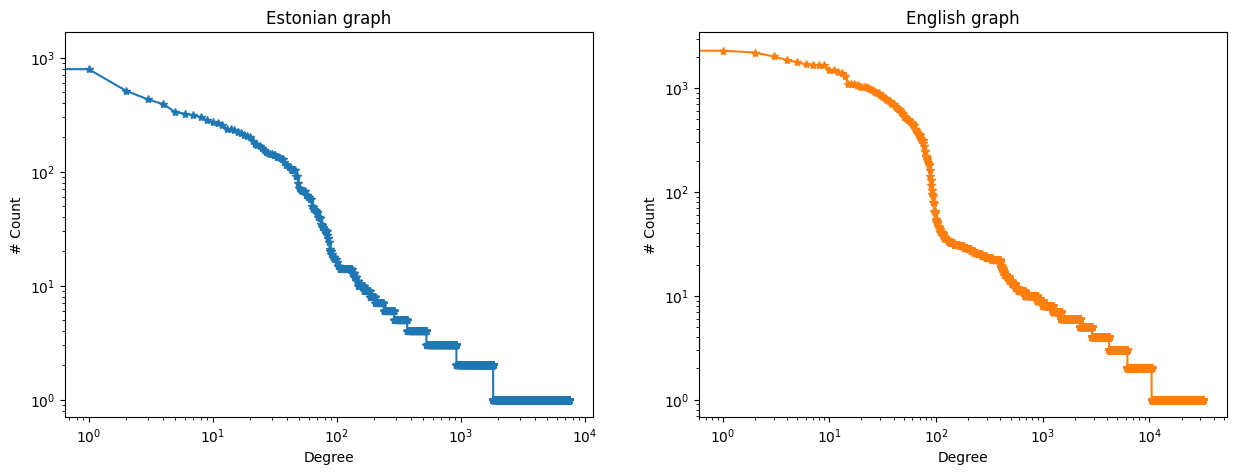

In [8]:
degree_sequence_et = sorted(degrees_et, reverse = True)
degree_sequence_en = sorted(degrees_en, reverse = True)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].loglog(degree_sequence_et, color = "C0", marker = "*")
axs[0].set_xlabel("Degree")
axs[0].set_ylabel("# Count")
axs[0].set_title("Estonian graph")
axs[1].loglog(degree_sequence_en, color = "C1", marker = "*")
axs[1].set_xlabel("Degree")
axs[1].set_ylabel("# Count")
axs[1].set_title("English graph")
plt.savefig("powerlaw.png", dpi=300)
plt.show()

### Clustering coefficient

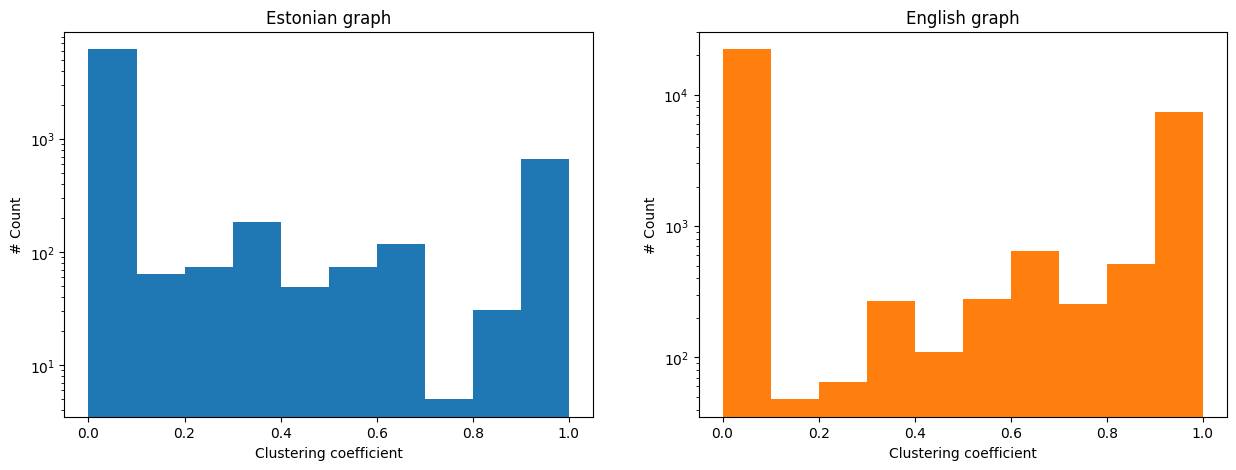

In [9]:
clustering_et = nx.clustering(G_et)
clustering_en = nx.clustering(G_en)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(clustering_et.values(), color = "C0")
axs[0].set_yscale("log")
axs[0].set_xlabel("Clustering coefficient")
axs[0].set_ylabel("# Count")
axs[0].set_title("Estonian graph")
axs[1].hist(clustering_en.values(), color = "C1")
axs[1].set_yscale("log")
axs[1].set_xlabel("Clustering coefficient")
axs[1].set_ylabel("# Count")
axs[1].set_title("English graph")
plt.savefig("clustering.png", dpi=300)
plt.show()